Installing the pandas and faker modules

In [1]:
!pip install pandas faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 59.1 MB/s eta 0:00:00


In [6]:
import pandas as pd
from faker import Faker
import random
from datetime import datetime
import numpy as np

# Initialize our data generator
fake = Faker()

# Let's create a list to hold our customer data
customer_data = []

# Generate 100 fake customer profiles
for _ in range(100):
    customer = {
        'name': fake.name(),
        'email': fake.email(),
        'address': fake.address().replace('\n', ', '), # a little pre-cleaning
        'join_date': fake.date_between(start_date='-5y', end_date='today')
    }
    customer_data.append(customer)

# Now, let's use pandas to turn this list into a table (DataFrame)
df = pd.DataFrame(customer_data)



In [7]:
df.head()

,name,email,address,join_date
0,Frank Cordova,fergusonsamantha@example.org,"21518 Johnson Lane Suite 582, West Daniel, MT ...",2025-06-08
1,Sandra Allen,steven92@example.net,"1860 Maynard Way Suite 127, East Stephen, MO 0...",2023-05-29
2,Connor Gibson,butlerjaime@example.com,"33704 Flynn Isle Apt. 882, South Robert, PW 39855",2020-12-23
3,Laurie Larson,moniquecollins@example.org,"28545 Lawson Trace, Cynthialand, MT 93960",2024-11-09
4,Ronnie Torres,kaitlyncox@example.net,"0518 Patricia Courts, Kimberlychester, TX 28873",2022-02-03


In [9]:
for _ in range(15):
  # Get a random row and column index
  random_row = df.sample().index[0]
  random_col = random.choice(df.columns)
  df.loc[random_row, random_col] = np.nan

df.head(10)


,name,email,address,join_date
0,Frank Cordova,fergusonsamantha@example.org,"21518 Johnson Lane Suite 582, West Daniel, MT ...",2025-06-08
1,Sandra Allen,steven92@example.net,"1860 Maynard Way Suite 127, East Stephen, MO 0...",2023-05-29
2,Connor Gibson,butlerjaime@example.com,"33704 Flynn Isle Apt. 882, South Robert, PW 39855",2020-12-23
3,Laurie Larson,moniquecollins@example.org,"28545 Lawson Trace, Cynthialand, MT 93960",2024-11-09
4,Ronnie Torres,kaitlyncox@example.net,"0518 Patricia Courts, Kimberlychester, TX 28873",2022-02-03
5,Adam Herrera,stephanierobinson@example.org,"PSC 5271, Box 4371, APO AA 62610",2022-11-14
6,Rhonda Thomas,misty11@example.org,"14938 Jason Ports Suite 172, Simpsonshire, ME ...",2020-09-10
7,Eric Kramer,phillipsrobert@example.org,"73209 Dennis Meadow Apt. 124, Lake Margaretsid...",NaN
8,Edward Gilmore,erichards@example.com,"61192 Nicholas Road, Jenningsmouth, OH 99803",2024-06-22
9,Todd Miller,denise26@example.net,"9782 Emily Pine Apt. 352, Audreytown, AL 09466",2025-08-04


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       91 non-null     object
 1   email      96 non-null     object
 2   address    96 non-null     object
 3   join_date  88 non-null     object
dtypes: object(4)
memory usage: 3.3+ KB


In [11]:
# Select the 'email' column and fill its missing values
df.fillna({'join_date':'join_date_not_provided'}, inplace=True)

df.isnull().sum()

,0
name,9
email,4
address,4
join_date,0


In [12]:
# Let's grab the 10th and 20th rows and add them to the end of our DataFrame
duplicate_rows = df.iloc[[10, 20]]
df = pd.concat([df, duplicate_rows], ignore_index=True)

In [13]:
# This uses the True/False output to filter our DataFrame
df[df.duplicated()]

,name,email,address,join_date
100,Alex Ortiz,philipbrown@example.net,"7286 Manning Gateway Apt. 779, Joshuatown, MT ...",2022-01-28
101,Michelle Salazar,iatkins@example.net,"3794 Brooks Mills, Lake Brooke, MP 23208",2024-07-30


In [14]:
# This finds and removes duplicate rows, keeping only the first instance
df.drop_duplicates(inplace=True)

In [15]:
# Check the dimensions (rows, columns) of the DataFrame
df.shape

(100, 4)

In [16]:
import numpy as np

# Add a new 'age' column with random ages between 18 and 70
df['age'] = np.random.randint(18, 71, size=len(df))

# Now, let's get a statistical summary of the numerical columns
df.describe()

,age
count,100.000000
mean,42.760000
std,14.265959
min,18.000000
25%,31.500000
50%,42.500000
75%,54.000000
max,69.000000


In [17]:
# Count the occurrences of each unique join_date
df['join_date'].value_counts()

,count
join_date,
join_date_not_provided,12
2020-09-10,2
2022-01-28,2
2024-03-27,2
2025-06-08,1
...,...
2021-10-11,1
2022-01-29,1
2023-01-29,1


In [18]:
!pip install matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns

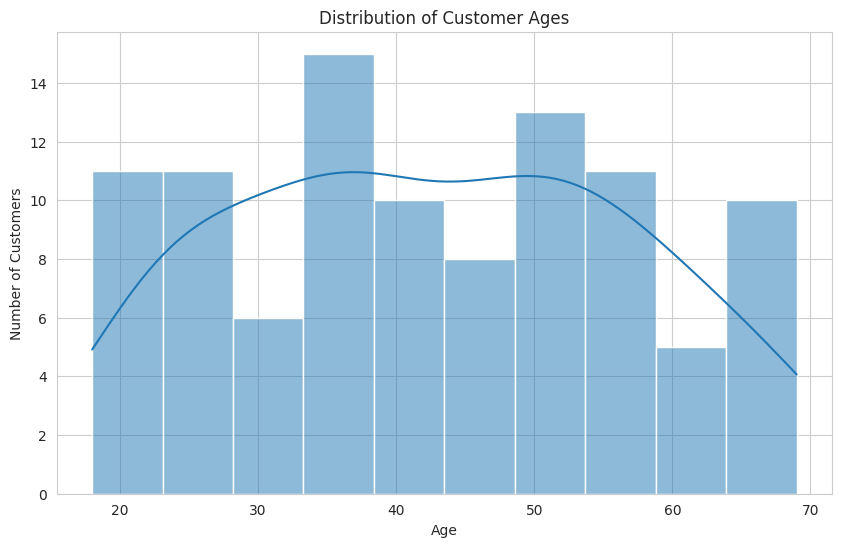

In [19]:
# Set the style for our plots
sns.set_style("whitegrid")

# Create a histogram of the 'age' column
plt.figure(figsize=(10, 6)) # Optional: makes the plot bigger
sns.histplot(data=df, x='age', bins=10, kde=True)

# Add titles and labels for clarity
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Number of Customers')

# Display the plot
plt.show()